In [1]:
import pandas as pd

In [4]:
rft = pd.read_csv('/content/rft_bLongevity_ClosingSeason(noCategory).csv', sep = ',')
rft.head()

,BUSINESS_ID,OPENING_DATE,CLOSING_DATE,LONGEVITY_INDAYS,STATE,AVG_RETAIL_FOOT_TRAFFIC,SEASON_CLOSED
0,_34KJPR-T0HP9USJw1nCfw,2012-10-17,2022-01-15,3377,PA,7.209490,Winter
1,Hl_vXTiYLozWo7T9Cq17vw,2020-10-25,2022-01-14,446,CA,8.570494,Winter
2,yg6GkcxEkY9mFX5UsWofWw,2012-06-24,2021-09-02,3357,AZ,6.175438,Summer
3,t-crW_BzXwXIOoiYQGLIow,2016-04-02,2021-09-18,1995,PA,7.209490,Summer
4,zbUyNmrSIhPSh4HOosX2vQ,2016-10-25,2022-01-03,1896,PA,7.209490,Winter


In [6]:
import matplotlib.pyplot as plt

In [11]:
category_counts = rft['SEASON_CLOSED'].value_counts()

print(category_counts)

Fall      43357
Winter    41740
Summer    31450
Spring    21473
Name: SEASON_CLOSED, dtype: int64


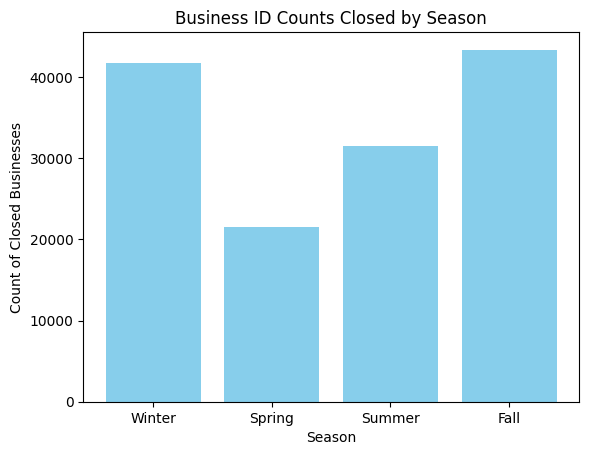

In [29]:
# Sample data
categories = ['Winter', 'Spring', 'Summer', 'Fall']
values = [41740, 21473, 31450, 43357]

# Plotting the bar graph
plt.bar(categories, values, color='skyblue')

# Adding labels to the axes
plt.xlabel('Season')
plt.ylabel('Count of Closed Businesses')

# Adding a title to the graph
plt.title('Business ID Counts Closed by Season')

# Displaying the graph
plt.show()

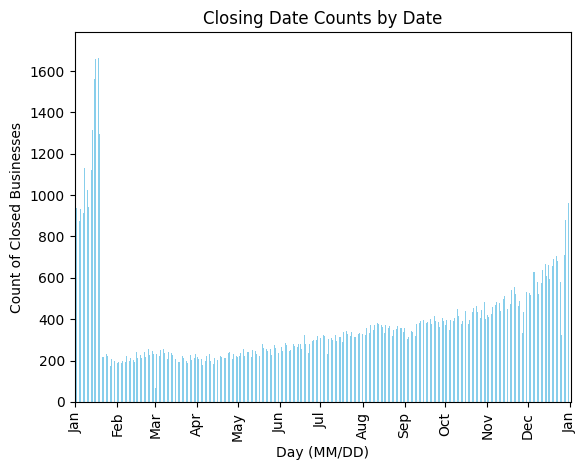

In [31]:
from matplotlib.dates import MonthLocator, DateFormatter

rft['CLOSING_DATE'] = pd.to_datetime(rft['CLOSING_DATE'])

rft['MonthDay'] = rft['CLOSING_DATE'].dt.strftime('%m/%d')

date_counts = rft['MonthDay'].value_counts()

date_counts = date_counts.sort_index()

fig, ax = plt.subplots()
date_counts.plot(kind='bar', color='skyblue', ax=ax)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

plt.xlabel('Day (MM/DD)')
plt.ylabel('Count of Closed Businesses')
plt.title('Closing Date Counts by Date')

plt.show()

In [33]:
rft.describe()

,LONGEVITY_INDAYS,AVG_RETAIL_FOOT_TRAFFIC
count,138020.000000,138020.000000
mean,2456.747993,8.225065
std,1352.565649,2.126780
min,1.000000,4.315533
25%,1375.750000,7.209490
50%,2370.000000,7.279030
75%,3438.000000,9.428110
max,6170.000000,13.495401


In [35]:
bin_edges = [0,8,14]

bin_labels = ['low','high']

rft['Bins'] = pd.cut(rft['AVG_RETAIL_FOOT_TRAFFIC'], bins=bin_edges, labels=bin_labels)

In [36]:
bins_counts = rft['Bins'].value_counts()

print(bins_counts)

low     80205
high    57815
Name: Bins, dtype: int64


In [ ]:
rft.head()

In [39]:
pivot_table = pd.pivot_table(rft, values='BUSINESS_ID', index='SEASON_CLOSED', columns='Bins', aggfunc='count', fill_value=0)

print(pivot_table)

Bins             low   high
SEASON_CLOSED              
Fall           24861  18496
Spring         12722   8751
Summer         18241  13209
Winter         24381  17359


In [41]:
categories = ['Winter', 'Spring', 'Summer', 'Fall']
count_high = [17359, 8751, 13209, 18496]
count_low = [24381, 12722, 18241, 24861]

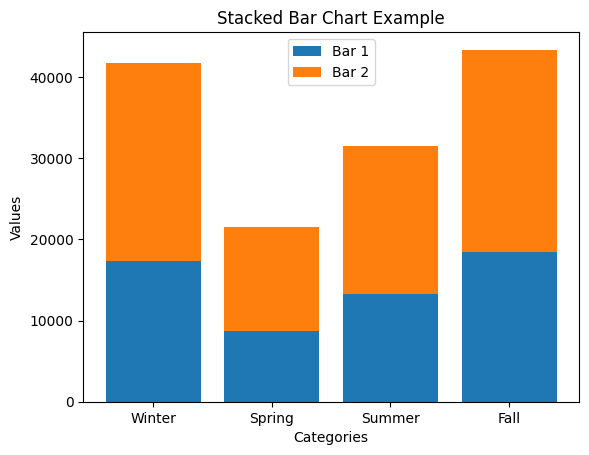

In [42]:
# Plotting the stacked bar chart
plt.bar(categories, count_high, label='Bar 1')
plt.bar(categories, count_low, bottom=count_high, label='Bar 2')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Stacked Bar Chart Example')

# Adding legend
plt.legend()

# Display the chart
plt.show()


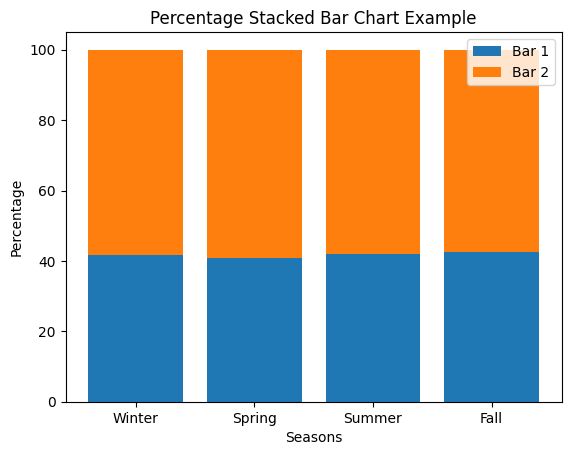

In [45]:
# Sample data
categories = ['Winter', 'Spring', 'Summer', 'Fall']
count_high = [17359, 8751, 13209, 18496]
count_low = [24381, 12722, 18241, 24861]

# Calculate percentages
total = [h + l for h, l in zip(count_high, count_low)]
percentage_high = [h / t * 100 for h, t in zip(count_high, total)]
percentage_low = [l / t * 100 for l, t in zip(count_low, total)]

# Plotting the percentage stacked bar chart
plt.bar(categories, percentage_high, label='Bar 1')
plt.bar(categories, percentage_low, bottom=percentage_high, label='Bar 2')

# Adding labels and title
plt.xlabel('Seasons')
plt.ylabel('Percentage')
plt.title('Percentage Stacked Bar Chart Example')

# Adding legend
plt.legend()

# Display the chart
plt.show()


In [46]:
rft_2 = pd.read_csv('/content/rft_state_season_perDay.csv', sep = ',')
rft_2.head()

,STATE,AVG_DAILY_FOOT_TRAFFIC,DATE,SEASON
0,CA,8.419063,2020-05-27,Spring
1,MO,8.132292,2020-05-27,Spring
2,FL,9.635312,2020-05-26,Spring
3,IL,5.771458,2020-05-26,Spring
4,LA,5.970313,2020-05-26,Spring


In [64]:
import pandas as pd

# Assuming you have a DataFrame rft_2 with a 'DATE' column
rft_2['DATE'] = pd.to_datetime(rft_2['DATE'])

# Extracting the month and day as 'mm/dd' format
rft_2['MonthDay'] = rft_2['DATE'].dt.strftime('%m/%d')

# Creating a new 'Month' column based on the 'DATE' column
rft_2['Month'] = rft_2['DATE'].dt.month

# Group by 'Category' and calculate the average of 'Value' for each group
grouped_rft_2 = rft_2.groupby('Month')['AVG_DAILY_FOOT_TRAFFIC'].mean()

# Display the result
print(grouped_rft_2)

Month
1      8.199090
2      8.641202
3      8.523387
4      7.607070
5      8.583327
6      9.727077
7     10.171861
8      9.469179
9      9.152966
10     8.780255
11     8.382426
12     8.572942
Name: AVG_DAILY_FOOT_TRAFFIC, dtype: float64


In [57]:
grouped_rft_3 = rft_2.groupby('DATE')['AVG_DAILY_FOOT_TRAFFIC'].mean()

print(grouped_rft_3)

DATE
2018-01-01     9.695434
2018-01-02    11.381233
2018-01-03    13.400660
2018-01-04    13.970365
2018-01-05    10.834809
                ...    
2022-09-09    13.164792
2022-09-10    10.371629
2022-09-11     6.556705
2022-09-12    10.740909
2022-09-13    10.884025
Name: AVG_DAILY_FOOT_TRAFFIC, Length: 1717, dtype: float64


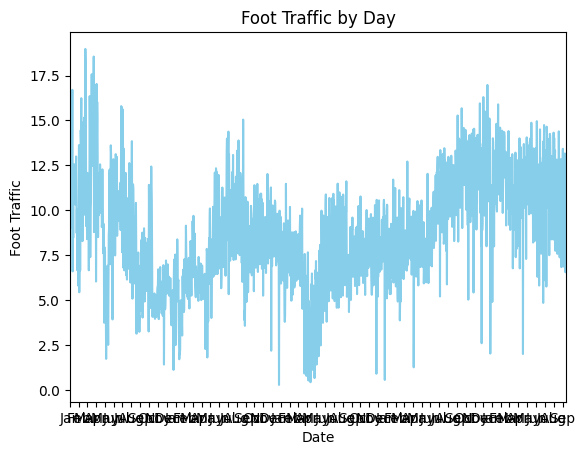

In [59]:
fig, ax = plt.subplots()
grouped_rft_3.plot(kind='line', color='skyblue', ax=ax)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

plt.xlabel('Date')
plt.ylabel('Foot Traffic')
plt.title('Foot Traffic by Day')

plt.show()

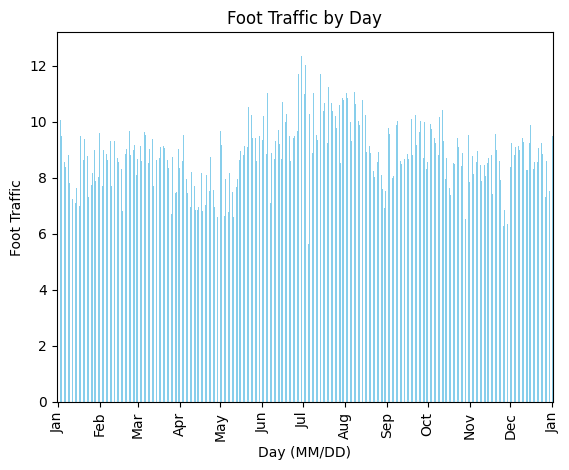

In [56]:
fig, ax = plt.subplots()
grouped_rft_2.plot(kind='bar', color='skyblue', ax=ax)

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

plt.xlabel('Day (MM/DD)')
plt.ylabel('Foot Traffic')
plt.title('Foot Traffic by Day')

plt.show()